<a href="https://colab.research.google.com/github/helloWorld199/GeoLocalizator/blob/master/Feb_2021_ES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataframe = pd.read_csv("https://openmv.net/file/raw-material-characterization.csv")
data = dataframe.to_numpy()
A = data[:,2:].astype(np.float64)
labels = data[:,1]
groups = ("Adequate", "Poor")


In [13]:
print("Number of samples: ", len(labels))
print("Number of 'Adequate' samples: ", np.sum(labels == "Adequate"))
print("Number of 'Poor' samples: ", np.sum(labels == "Poor"))

Number of samples:  24
Number of 'Adequate' samples:  17
Number of 'Poor' samples:  7


Performing PCA

In [22]:
A_mean = np.mean(A, axis=0)
A_mean.shape
U, s, VT = np.linalg.svd(A - A_mean.T, full_matrices = False)

VT.shape

(6, 6)

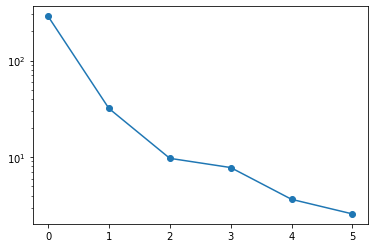

In [29]:
fig, ax = plt.subplots(nrows=1,ncols=1)
plt.yscale("log")
ax.plot(s, "o-")

In [34]:
PHI = A @ VT.T

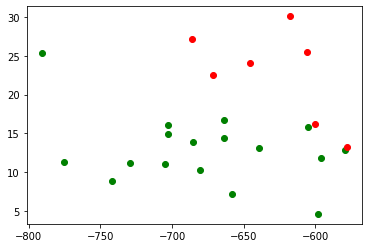

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=1)
for i in range(PHI.shape[0]):
  if(labels[i] ==  "Adequate"):
    ax.scatter(PHI[i, 0], PHI[i, 1], c="g")
  if(labels[i] == "Poor"):
    ax.scatter(PHI[i, 0], PHI[i, 1], c="r")